In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df=pd.read_csv("C:/Users/prish/Downloads/wine-200803-123739.csv")
df.head()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


#We are given the composition of various chemicals present in wines produced by three different grape cultivars,we need to build a model that can predict which cultivar the wine came from given its composition(hence the column named "name" is our target variable)

In [3]:
#defining features and target
X = df.drop(['name'],axis=1)

y= df['name'] 

In [4]:
X.head()

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform
X_standardized = scaler.fit_transform(X)

In [6]:
X_standardized

array([[ 0.2558245 , -0.50162433, -0.8244853 , ...,  0.40709978,
         1.13169801,  0.97105248],
       [ 0.20622873,  0.01802001,  1.10768971, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [ 1.70650069, -0.34931478,  0.48793547, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 0.34261709,  1.73822194, -0.38701171, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 0.21862767,  0.22408586,  0.01400575, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.40892609,  1.57695301,  1.36288264, ..., -1.51861275,
        -1.42836295, -0.58949046]])

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_standardized,y,test_size=0.2,random_state=1)

In [8]:
print(X_train.shape) #since we had dropped a few cols, now we deal with about 4700 features
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(141, 13)
(141,)
(36, 13)
(36,)


In [9]:
from sklearn.linear_model import LogisticRegression 

In [10]:
%%time
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

CPU times: total: 0 ns
Wall time: 10 ms


LogisticRegression(random_state=0)

In [11]:
y_predict=classifier.predict(X_test)

In [12]:
y_predict

array([3, 2, 1, 2, 1, 3, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       3, 2, 1, 2, 1, 1, 1, 2, 3, 3, 3, 1, 2, 2], dtype=int64)

In [13]:
from sklearn import metrics
RMSE_test =np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('RMSE for a test set is : ',RMSE_test)

RMSE for a test set is :  0.16666666666666666


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16
           3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



#Now we use PCA and see if we get a better model

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA() #since we have not specified any percentage , 13 features give 13 PC's


In [17]:
pca.fit_transform(X_train)

array([[-1.33040619, -1.91045918, -0.82706508, ...,  0.65083476,
        -0.37770046,  0.03953299],
       [-3.062232  , -0.48061484,  0.91580932, ...,  0.19494122,
        -0.19036932, -0.04254804],
       [-0.30280939, -1.97190991, -1.37682691, ..., -0.04114759,
         0.06918989,  0.16347138],
       ...,
       [ 2.63432317,  0.61305774, -3.23349602, ..., -1.24194351,
         0.2885565 , -0.10645182],
       [-2.18182929,  0.16156573,  0.91542334, ...,  0.59714131,
        -0.14971591, -0.30470036],
       [ 1.64399737, -0.72812307,  1.40820708, ..., -0.38352171,
         0.26830538,  0.2523828 ]])

In [18]:
pca_components_df = pd.DataFrame(pca.components_)
pca_components_df.head()   

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.117965,-0.270603,-0.028637,-0.237198,0.122912,0.378643,0.415205,-0.317148,0.339854,-0.105611,0.295373,0.379603,0.257530
1,0.481384,0.220446,0.315415,0.014498,0.329231,0.094143,0.023738,0.027534,0.079156,0.510075,-0.246869,-0.161000,0.384826
2,0.160878,-0.151437,-0.597474,-0.615143,-0.046454,-0.149239,-0.127306,-0.169586,-0.185905,0.190254,-0.088006,-0.226049,0.129662
3,-0.070956,0.563773,-0.275298,0.001805,-0.246162,0.115170,0.101321,-0.255559,0.466058,0.064970,-0.414264,0.113432,-0.214439
4,-0.314771,-0.014594,-0.134445,0.070583,0.814687,-0.161602,-0.132023,-0.256760,0.221357,-0.100106,-0.028530,-0.171036,-0.123998


In [19]:
pca_components_df = pd.DataFrame({'PC1_coef':pca.components_[0],'PC2_coef':pca.components_[1],'PC3_coef':pca.components_[2], 'PC4_coef':pca.components_[3], 
                       'PC5_coef':pca.components_[4],'PC6_coef':pca.components_[5],'PC7_coef':pca.components_[6], 'PC8_coef':pca.components_[7], 
                       'PC9_coef':pca.components_[8],'PC10_coef':pca.components_[9],'PC11_coef':pca.components_[10], 'PC12_coef':pca.components_[11],
                       'PC13_coef':pca.components_[12]})

pca_components_df.head()

,PC1_coef,PC2_coef,PC3_coef,PC4_coef,PC5_coef,PC6_coef,PC7_coef,PC8_coef,PC9_coef,PC10_coef,PC11_coef,PC12_coef,PC13_coef
0,0.117965,0.481384,0.160878,-0.070956,-0.314771,-0.199338,-0.092118,0.566089,-0.193547,0.014684,0.420265,0.203360,0.004913
1,-0.270603,0.220446,-0.151437,0.563773,-0.014594,-0.224450,-0.589506,0.102989,0.171120,0.093674,-0.261483,-0.148525,0.014102
2,-0.028637,0.315415,-0.597474,-0.275298,-0.134445,-0.129211,0.003604,-0.385537,0.202691,0.378829,0.279216,-0.021346,-0.143159
3,-0.237198,0.014498,-0.615143,0.001805,0.070583,-0.111242,0.405077,0.415206,-0.035468,-0.337249,-0.257458,0.138595,0.103899
4,0.122912,0.329231,-0.046454,-0.246162,0.814687,-0.037963,-0.232509,0.008085,-0.273543,-0.066300,0.012989,-0.088267,0.085337


#Here, we can see that each principal component tries to learn from all 13 features,therefore there are 13 rows below each 

In [20]:
pca_components_df.tail()

,PC1_coef,PC2_coef,PC3_coef,PC4_coef,PC5_coef,PC6_coef,PC7_coef,PC8_coef,PC9_coef,PC10_coef,PC11_coef,PC12_coef,PC13_coef
8,0.339854,0.079156,-0.185905,0.466058,0.221357,0.575388,0.103160,0.165648,0.299776,0.013864,0.304755,0.075317,-0.140378
9,-0.105611,0.510075,0.190254,0.064970,-0.100106,0.214168,0.437777,0.002829,-0.077091,0.155505,-0.254631,-0.587533,0.023423
10,0.295373,-0.246869,-0.088006,-0.414264,-0.028530,0.072991,-0.206599,0.507460,0.290510,0.318447,-0.284571,-0.296513,-0.106796
11,0.379603,-0.161000,-0.226049,0.113432,-0.171036,-0.219240,-0.088814,-0.077944,-0.203391,-0.463277,0.247070,-0.592305,-0.082893
12,0.257530,0.384826,0.129662,-0.214439,-0.123998,0.002862,-0.095687,-0.184399,0.505035,-0.539044,-0.295146,0.173550,-0.037264


In [21]:
colnames=list(X.columns)

In [22]:
pc2_df = pd.DataFrame({'PC2_coef':pca.components_[1],
                       'Feature': colnames})

pc2_df  

,PC2_coef,Feature
0,0.481384,alcohol
1,0.220446,malicAcid
2,0.315415,ash
3,0.014498,ashalcalinity
4,0.329231,magnesium
5,0.094143,totalPhenols
6,0.023738,flavanoids
7,0.027534,nonFlavanoidPhenols
8,0.079156,proanthocyanins
9,0.510075,colorIntensity


#just to see the contribution of each feature to a principle component,we can see them through coefficients,
a positive coefficient means that as the feature increases, so does the score on the principal component, and vice versa.
This information helps in understanding which features are most influential in the variation captured by the a principal component.

In [23]:
pc_component_breakup_df = pd.DataFrame({'PC1_coef':pca.components_[0],'PC2_coef':pca.components_[1],'PC3_coef':pca.components_[2], 'PC4_coef':pca.components_[3], 
                       'PC5_coef':pca.components_[4],'PC6_coef':pca.components_[5],'PC7_coef':pca.components_[6], 'PC8_coef':pca.components_[7], 
                       'PC9_coef':pca.components_[8],'PC10_coef':pca.components_[9],'PC11_coef':pca.components_[10], 'PC12_coef':pca.components_[11],
                       'PC13_coef':pca.components_[12], 'Feature': colnames})
pc_component_breakup_df.head(15)

,PC1_coef,PC2_coef,PC3_coef,PC4_coef,PC5_coef,PC6_coef,PC7_coef,PC8_coef,PC9_coef,PC10_coef,PC11_coef,PC12_coef,PC13_coef,Feature
0,0.117965,0.481384,0.160878,-0.070956,-0.314771,-0.199338,-0.092118,0.566089,-0.193547,0.014684,0.420265,0.203360,0.004913,alcohol
1,-0.270603,0.220446,-0.151437,0.563773,-0.014594,-0.224450,-0.589506,0.102989,0.171120,0.093674,-0.261483,-0.148525,0.014102,malicAcid
2,-0.028637,0.315415,-0.597474,-0.275298,-0.134445,-0.129211,0.003604,-0.385537,0.202691,0.378829,0.279216,-0.021346,-0.143159,ash
3,-0.237198,0.014498,-0.615143,0.001805,0.070583,-0.111242,0.405077,0.415206,-0.035468,-0.337249,-0.257458,0.138595,0.103899,ashalcalinity
4,0.122912,0.329231,-0.046454,-0.246162,0.814687,-0.037963,-0.232509,0.008085,-0.273543,-0.066300,0.012989,-0.088267,0.085337,magnesium
5,0.378643,0.094143,-0.149239,0.115170,-0.161602,0.094139,-0.053578,-0.111299,-0.524815,0.128480,-0.453146,0.281559,-0.430627,totalPhenols
6,0.415205,0.023738,-0.127306,0.101321,-0.132023,0.000297,-0.000680,-0.101571,-0.065768,0.186766,-0.127521,0.084487,0.842742,flavanoids
7,-0.317148,0.027534,-0.169586,-0.255559,-0.256760,0.663454,-0.401181,-0.009604,-0.244338,-0.216796,0.046239,-0.054621,0.160096,nonFlavanoidPhenols
8,0.339854,0.079156,-0.185905,0.466058,0.221357,0.575388,0.103160,0.165648,0.299776,0.013864,0.304755,0.075317,-0.140378,proanthocyanins
9,-0.105611,0.510075,0.190254,0.064970,-0.100106,0.214168,0.437777,0.002829,-0.077091,0.155505,-0.254631,-0.587533,0.023423,colorIntensity


#As expected, it is a nxn matrix

#we know that PCA removes multicollinearity such that each PC is orthogonal to others

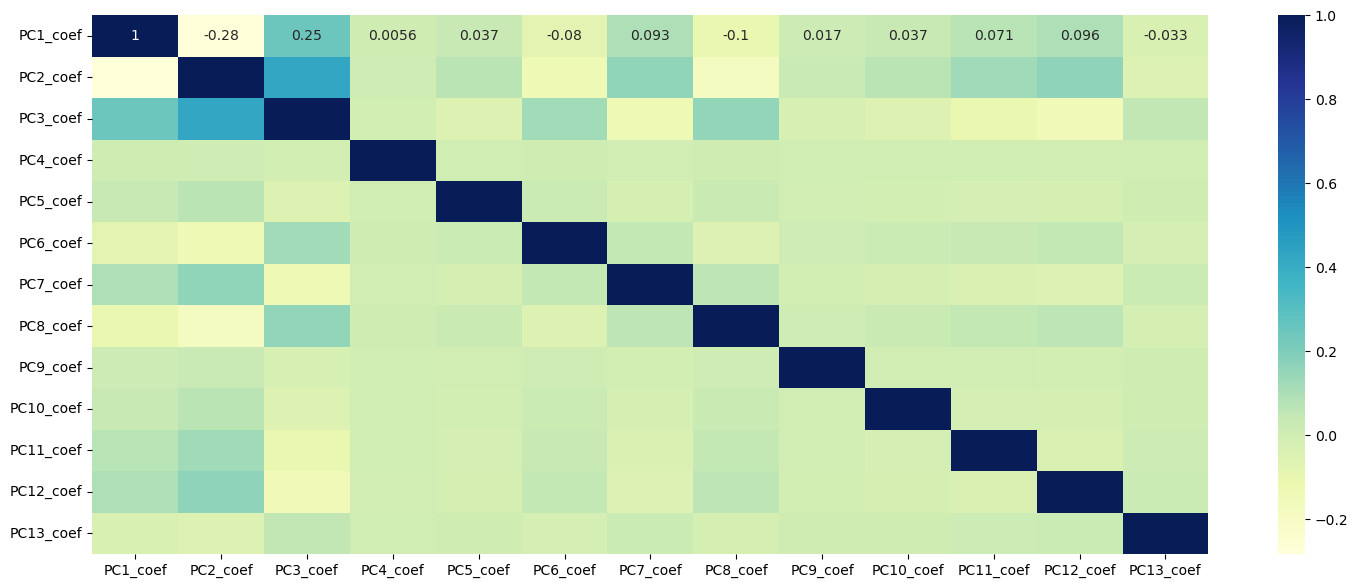

In [24]:
#plotting correlation heatmap
plt.figure(figsize = (18, 7))
sns.heatmap(pca_components_df.corr(), annot = True, cmap="YlGnBu")
plt.show()
#We will observe that each PC is almost uncorrelated to others,this is because is successive PC tries to capture maximum variance of off the left percentage variance

In [25]:
pca = PCA().fit(X_train)
pca.explained_variance_ratio_

array([0.37739213, 0.18369193, 0.11016446, 0.07586534, 0.06542409,
       0.04737943, 0.04083736, 0.02531683, 0.02084787, 0.01895912,
       0.01605878, 0.01237057, 0.00569209])

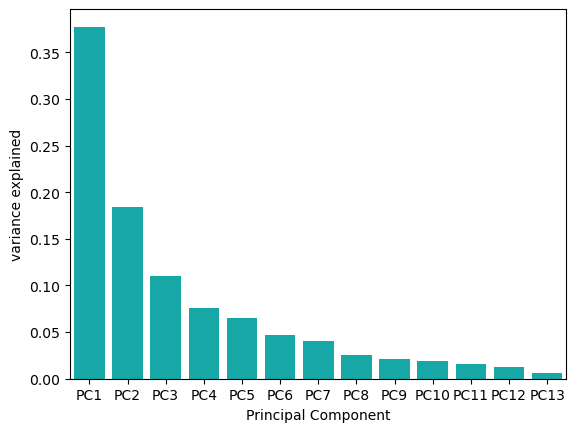

In [26]:
df = pd.DataFrame({'variance explained':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']})
sns.barplot(x='Principal Component',y="variance explained", 
           data=df, color="c");

Text(0.5, 1.0, 'Scree Plot')

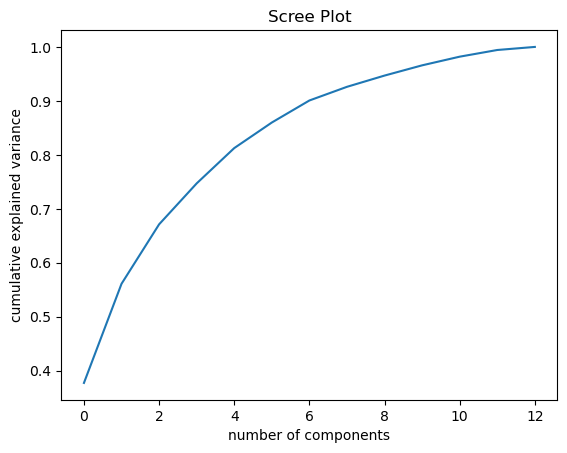

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Scree Plot')

A scree plot tells us the amount of variance explained as the number of PC's increases

In [28]:
# after getting satisfied with views above we are creating PCA object to include 95% of information into use
# using option  to set % of variance expected in output
pca = PCA(0.96)

# other option to use number of components by viewing the scree plot
#pca = PCA(n_components = 2) 

In [29]:
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 

In [30]:
from sklearn.linear_model import LogisticRegression 

In [31]:

%%time
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

CPU times: total: 0 ns
Wall time: 6 ms


LogisticRegression(random_state=0)

In [32]:
y_predict = classifier.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_predict) 
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

